## Man fears time, but time fears the Pyramids.

Probably all of you saw maps of Ancient Egyptian sites (I had school workbook) in stylized way like this below:

![Map of Ancient Egypt](https://www.dropbox.com/s/cvhbuugrkstto3b/map-of-ancient-egypt.png?raw=1)

I wished to recreate this kind of map using Python and OpenStreetMap but the problem I faced was the absolute absence of some dataset or even list with coordinates of egyptian pyramids. So I took different historical sources, Google Maps, wikipedia (in English, French, Deutsch, Russian) and combined the information in one dataset of known pyramids as an .csv file ([dataset of known pyramids](https://www.kaggle.com/lsind18/egyptianpyramids)). If you have more information or find some nonconformity - let me know! **Such important part of mankind history shouldn't be forgotten.**

> This notebook uses only 2 modules: [*pandas*](https://pandas.pydata.org) (for dataframes) and [*folium*](https://python-visualization.github.io/folium/) (for interactive maps based on OpenStreetMap).


##  Short (historical mostly) overview of this work

### &#x1F53A; Data preparation 

**1. Import modules**

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt # plotting data
import seaborn as sns 
sns.set(color_codes=True)

**2. Check the .csv file with pyramids:**

 - the file contains 62 Egyptian pyramids;
 - every pyramid has a *Modern Name* and some of them have an *Ancient Name* as it was translated from ancient egyptian hieroglyphs (62 entires);
 - every pyramid has its coordinates - *Latitude* and *Longitude* in decimal form (62 entries);
 - there are owners of a pyramid and sometimes supposed owners - symbol '**(?)**' follows the name of *Pharaoh* (62 entries);
 - every pyramid is marked with it's *Dynasty* and location (*Site*) (62 entries);
 - there is missing data (*Slope* and *Volume* of some pyramids mostly);
 - base (*Base1 (m)* and *Base2 (m)*) and *Height (m)* of pyramid are in meters and represent the original size (that the pyramid was or was supposed to be);
 - some pyramids are marked with a [*Lepsius* number](https://en.wikipedia.org/wiki/Lepsius_list_of_pyramids) which is a roman number from I to LXVII plus the pyramid number LG100 (pyramid of Khentkaus I);
 - most pyramids have a *Type* of construction (Step, True, Smooth-faced, Smooth-sided) and most used *Material* (Limestone, Mudbrick, Granite, Sandstone or a combination);
 - there is also a column *Comment* which contains some descriptive information.

In [2]:
prmds = pd.read_csv('/kaggle/input/egyptianpyramids/pyramids.csv')
prmds

,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.00,109.00,60.00,NaN,330.4,29.871215,31.216644,Step,XXXII,Mudbrick,NaN
1,Sekhemkhet,-,Buried Pyramid,3,Saqqara,120.00,120.00,70.00,NaN,33.6,29.866000,31.213000,Step,NaN,Mudbrick,(unfinished)
2,Khaba (?),-,Layer Pyramid,3,Zawyet el'Aryan,84.00,84.00,40.00,NaN,47.04,29.932820,31.161262,Step,XIV,Mudbrick,(unfinished)
3,Huni,-,Pyramid Lepsius I,3,Abu Rawash,215.00,215.00,145.00,NaN,NaN,30.040833,31.094444,Step,I,Mudbrick,totally ruined
4,Huni (?),-,Pyramid of Athribis,3,Athribis,20.00,20.00,16.00,50.0,NaN,30.470556,31.188056,Step,NaN,Mudbrick,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Khendjer,-,Pyramid of Khendjer,13,South Saqqara,52.50,52.50,37.35,55.0,44.096,29.832222,31.223889,True,XLIV,Mudbrick,SIP
58,Weserkhau (?),-,Southern South Saqqara pyramid,13,South Saqqara,78.75,78.75,NaN,NaN,NaN,29.830556,31.222222,True,XLVI,Mudbrick,SIP
59,Neferhotep I,-,Tomb S9,13,Abydos,45.00,60.00,NaN,NaN,NaN,26.171389,31.925000,Mastaba,NaN,Mudbrick,SIP
60,Sobekhotep IV,-,Tomb S10,13,Abydos,40.00,30.00,NaN,NaN,NaN,26.171111,31.924167,Mastaba,NaN,Mudbrick,SIP


In [3]:
prmds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 16 columns):
Pharaoh             62 non-null object
Ancient name        62 non-null object
Modern name         62 non-null object
Dynasty             62 non-null int64
Site                62 non-null object
Base1 (m)           62 non-null float64
Base2 (m)           62 non-null float64
Height (m)          53 non-null float64
Slope (dec degr)    43 non-null float64
Volume (cu.m)       33 non-null object
Latitude            62 non-null float64
Longitude           62 non-null float64
Type                62 non-null object
Lepsius             44 non-null object
Material            61 non-null object
Comment             21 non-null object
dtypes: float64(6), int64(1), object(9)
memory usage: 7.9+ KB


**3. Get some statistics:**
- maximum height of pyramid is 146.6 meters (Great Pyramid of Giza) and minimum - 6.8 meters (Pyramid of Seila).

In [4]:
prmds.describe()

,Dynasty,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Latitude,Longitude
count,62.000000,62.000000,62.000000,53.000000,43.000000,62.000000,62.000000
mean,6.403226,78.977581,78.463065,47.817547,57.121628,29.226241,31.319200
std,3.889708,54.685717,54.199409,34.198331,11.411212,1.497457,0.446828
min,3.000000,18.000000,18.000000,6.800000,33.000000,24.085556,30.828611
25%,4.000000,41.100000,44.750000,18.000000,51.920000,29.621458,31.136257
50%,5.000000,72.650000,72.650000,47.000000,53.130000,29.850834,31.212611
75%,8.000000,105.000000,105.000000,60.000000,56.785000,29.924281,31.221598
max,18.000000,230.300000,230.300000,146.600000,82.000000,30.470556,32.885278


- most of the pyramids have the square base except 6 of them.

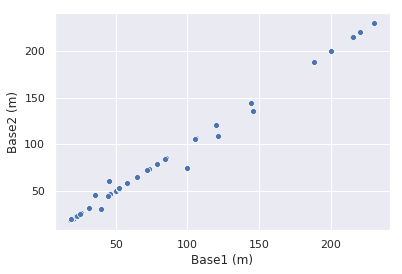

In [5]:
ax = sns.scatterplot(x='Base1 (m)',y='Base2 (m)', data=prmds)

In [6]:
prmds[prmds['Base1 (m)'] != prmds['Base2 (m)']]

,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.0,109.0,60.0,NaN,330.4,29.871215,31.216644,Step,XXXII,Mudbrick,NaN
27,Shepseskaf,The Purified Pyramid,Mastabat al-Fir'aun,4,Giza,99.6,74.4,18.0,70.0,148.271,29.838889,31.215000,Step,NaN,Sandstone. Granite. Limestone,Mastaba
28,Khentkawes,-,Step tomb of Khentkaus I,4,Giza,35.5,45.8,17.5,74.0,6.372,29.973306,31.135361,Step,LG100,Bedrock. Limestone,LG 100
46,Khui,-,Pyramid of Khui,8,Dara,146.0,136.0,15.0,NaN,NaN,27.307778,30.871667,Step,NaN,Limestone,FIP
59,Neferhotep I,-,Tomb S9,13,Abydos,45.0,60.0,NaN,NaN,NaN,26.171389,31.925000,Mastaba,NaN,Mudbrick,SIP
60,Sobekhotep IV,-,Tomb S10,13,Abydos,40.0,30.0,NaN,NaN,NaN,26.171111,31.924167,Mastaba,NaN,Mudbrick,SIP


**4. Arrange pyramids into periods:**

>*I am taking in consideration only Early Dynastic Period, Old Kingdom, FIP, Middle Kingdom, SIP and the beginning of New Kingdom.*

**I. Early Dynastic Period (c. 3150 BC – c. 2686 BC)**
 1. First Dynasty of Egypt (ca. 3100 BC – ca. 2900 BC)
 2. Second Dynasty of Egypt (Dynasty II, c. 2890 BC – c. 2686 BC)
 
 
**II. Old Kingdom (*Age of the Pyramids*, c. 2686 BC – 2181 BC)**
 3. Third Dynasty of Egypt (ca. 2686 BC–ca. 2613 BC)
 4. Fourth Dynasty of Egypt (ca. 2613 BC–ca. 2494 BC)
 5. Fifth Dynasty of Egypt (ca. 2494 BC–ca.** 2345 BC)
 6. Sixth Dynasty of Egypt (ca. 2345 BC–ca. 2181 BC)
    - *Seventh Dynasty of Egypt is considered spurious*
 

**III. First Intermediate Period (FIP) (*Dark age*, c. 2181 BC – c. 2055 BC)**
 8. Eight Dynasty of Egypt (ca. 2181 BC–ca. 2160 BC)
 9. Ninth Dynasty of Egypt (ca. 2160 BC–ca. 2130 BC)
 10. Tenth Dynasty of Egypt (ca. 2130 BC–ca. 2040 BC)
     - *these dynasties are often combined*
 

**IV. Middle Kingdom (*Reunification*, c. 2055 BC – c. 1650 BC)**
 11. Eleventh Dynasty of Egypt (ca. 2130 BC–ca. 1991 BC)
 12. Twelfth Dynasty of Egypt (1991 BC–1802 BC)
 13. Thirteenth Dynasty of Egypt (1803 BC–1649 BC)
 14. Fourteenth Dynasty of Egypt (ca. 1725 BC–ca. 1650 BC)
     - *these dynasties are often combined under the group title Middle Kingdom*

**V. Second Intermediate Period (SIP) (c. 1650 BC – c. 1550 BC)**
 15. Fifteenth Dynasty of Egypt (1650 BC–ca. 1550 BC)
 16. Sixteenth Dynasty of Egypt (1649 BC–1582 BC)
 17. Seventeenth Dynasty of Egypt (ca. 1580 BC–ca. 1550 BC)
 
** VI. New Kingdom (*Egyptian Empire*, c. 1550 BC – c. 1069 BC)**
 18. Eighteenth Dynasty of Egypt (1550 BC–1292 BC)
 
 
##  Creating a map with 62 pyramids

**5. Some preparations before creating marks on the map:**
  - find mean latitude and longitude of dataset;
  - create function to color different kingdoms;
  - provide a legend.

In [7]:
lat_mean = prmds['Latitude'].mean()
lon_mean = prmds['Longitude'].mean()

periods = {'EDP': (1,2), 'Old': (3,4,5,6,7), 'FIP': (8,9,10), 'Middle': (11,12,13,14), 'SIP': (15,16,17), 'New': (18,)}
colors_dyn = {'EDP':'violet', 'Old': 'green', 'FIP': 'blue', 'Middle': 'orange', 'SIP': 'yellow', 'New': 'red'}

def col_dyn(dyn):
    for k, v in periods.items():
        if dyn in v:
            c = colors_dyn[k]
            break
        else:
            c = 'black'
    return c

legend_kingdom = '''
     <div style= "position: fixed; 
     bottom: 45px; left: 15px; width: 150px; height: 150px;white-space: pre-line; 
     border:1px solid grey; z-index:9999; font-size:10px; background-color:white;
     ">&nbsp; <b>Period</b>
    &nbsp; Early Dyn. Period &emsp;<i class="fa fa-caret-up fa-2x"
                  style="color:violet"></i>
     &nbsp; Old Kingdom &emsp;<i class="fa fa-caret-up fa-2x"
                  style="color:green"></i>
     &nbsp; FIP &emsp;<i class="fa fa-caret-up fa-2x"
                  style="color:lightblue"></i>
     &nbsp; Middle Kingdom &emsp;<i class="fa fa-caret-up fa-2x"
                  style="color:orange"></i>
    &nbsp; SIP &emsp;<i class="fa fa-caret-up fa-2x"
                  style="color:yellow"></i>
    &nbsp; New Kingdom &emsp;<i class="fa fa-caret-up fa-2x"
                  style="color:red"></i>
      </div>
     '''

### &#x1F53A; Creation of two maps 

In [8]:
m = folium.Map(location = [lat_mean, lon_mean], #center of a map
               zoom_start=6, min_zoom = 5, control_scale = True, tiles='Stamen Terrain')

for i in range(0,len(prmds)):
    lat = prmds.iloc[i]['Latitude']
    lon = prmds.iloc[i]['Longitude']
    folium.Marker([lat, lon], popup=prmds.iloc[i]['Modern name'], # show a modern name of pyramid in popup
                  icon=folium.Icon(color=col_dyn(prmds.iloc[i]['Dynasty']),
                                   icon='eye-close' if str(prmds.iloc[i]['Pharaoh']).find("?")==-1 else 'eye-open') # glyphicon with open eye if Pharaoh is certain
                 ).add_to(m)
m.get_root().html.add_child(folium.Element(legend_kingdom))
display(m)

```Result: Map with pyramids on it!```
   - glyphicon with open eye shows if Pharaoh' name is certain
   - popup shows the modern name of pyramid
   
##  Creating a map with pyramids from Lepsius list

**7. Create [Lepsius list](https://en.wikipedia.org/wiki/Lepsius_list_of_pyramids) and map**

- Drop rows where Lepsius column contains NaN values 
- Create Lepsius map: zoom in to get the pyramids and the Pharaoh's name

In [9]:
prmds_Le = prmds.dropna(subset=['Lepsius'])
m2 = folium.Map(location = [prmds_Le['Latitude'].mean(), prmds_Le['Longitude'].mean()],
               zoom_start=9, min_zoom = 6, tiles='Stamen Toner')

for i in range(0,len(prmds_Le)):
    lat = prmds_Le.iloc[i]['Latitude']
    lon = prmds_Le.iloc[i]['Longitude']
    temp = prmds_Le.iloc[i]['Lepsius']
    folium.CircleMarker([lat, lon],  radius=8,  color='red', fill=True, fill_color='red').add_to(m2)
    folium.Marker([lat, lon], 
                  popup=prmds_Le.iloc[i]['Pharaoh'], 
                         icon=folium.DivIcon(html=f"""<div style="font-family: arial; color: 'black'">{"{}".format(temp)}</div>""")
                
        ).add_to(m2)
display(m2)

```Result: Lepsius Map !```
   - red circle represents a pyramid with a roman number in it; zoom in!
   - popup shows the owner's (pharaoh or his wife) name
------------------------------

## Conclusion: important links

### &#x1F53A; The interactive maps as an html [OpenStreetMap of 62 pyramids](https://lsind.github.io/map-of-Ancient-Egypt/map-pyramids.html) and [OpenStreetMap of Lepsius list](https://lsind.github.io/map-of-Ancient-Egypt/map-Lepsius.html)

### &#x1F53A; Download [source code on GitHub](https://github.com/LSIND/map-of-Ancient-Egypt/tree/master/source)

### P.S. Feel free to contact me if you have some additional info about [Egyptian pyramids dataset](https://www.kaggle.com/lsind18/egyptianpyramids).